# Using pyAgrum

| | | |
|-|-|-|
|[ ![Creative Commons License](images/cc4.png)](http://creativecommons.org/licenses/by-nc/4.0/) |[ ![aGrUM](images/logoAgrum.png)](https://agrum.org) |[ ![interactive online version](images/atbinder.svg)](https://agrum.gitlab.io/extra/agrum_at_binder.html)

In [1]:
%matplotlib inline
from pylab import *
import matplotlib.pyplot as plt

import os

## Initialisation

* importing pyAgrum
* importing pyAgrum.lib tools
* loading a BN

In [2]:
import pyAgrum as gum
import pyAgrum.lib.notebook as gnb
gnb.configuration()

Library,Version
OS,posix [darwin]
Python,"3.12.3 (main, Apr 9 2024, 08:09:14) [Clang 15.0.0 (clang-1500.3.9.4)]"
IPython,8.25.0
Matplotlib,3.9.0
Numpy,1.26.4
pyDot,2.0.0
pyAgrum,1.13.2.9


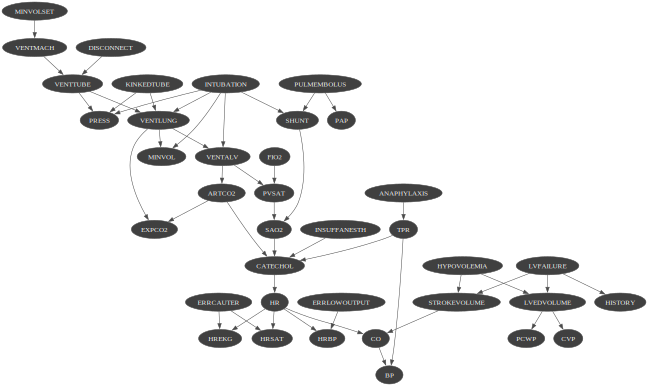

In [3]:
bn=gum.loadBN("res/alarm.dsl")
gnb.showBN(bn,size='9')

## Visualisation and inspection

In [4]:
print(bn['SHUNT'])

SHUNT:Labelized({NORMAL|HIGH})


In [5]:
print(bn.cpt(bn.idFromName('SHUNT')))


             ||  SHUNT            |
PULMEM|INTUBA||NORMAL   |HIGH     |
------|------||---------|---------|
TRUE  |NORMAL|| 0.1000  | 0.9000  |
FALSE |NORMAL|| 0.9500  | 0.0500  |
TRUE  |ESOPHA|| 0.1000  | 0.9000  |
FALSE |ESOPHA|| 0.9500  | 0.0500  |
TRUE  |ONESID|| 0.0100  | 0.9900  |
FALSE |ONESID|| 0.0500  | 0.9500  |



In [6]:
gnb.showPotential(bn.cpt(bn.idFromName('SHUNT')),digits=3)

## Results of inference

It is easy to look at result of inference

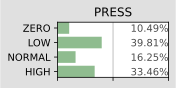

In [7]:
gnb.showPosterior(bn,{'SHUNT':'HIGH'},'PRESS')

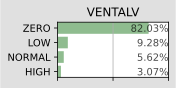

In [8]:
gnb.showPosterior(bn,{'MINVOLSET':'NORMAL'},'VENTALV')

Overall results

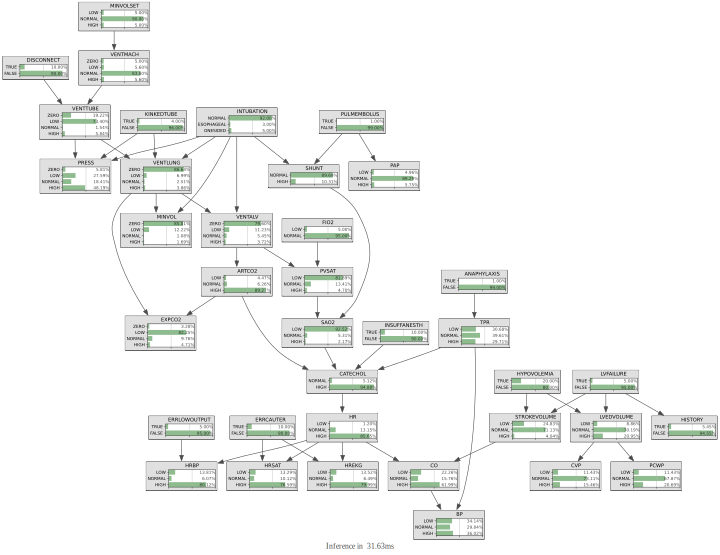

In [9]:
gnb.showInference(bn,size="10")

What is the impact of observed variables (SHUNT and VENTALV for instance) on another on (PRESS) ?

In [10]:
ie=gum.LazyPropagation(bn)
ie.evidenceImpact('PRESS',['SHUNT','VENTALV'])

(pyAgrum.Potential<double>@0x600003df1400) 
             ||  PRESS                                |
VENTAL|SHUNT ||ZERO     |LOW      |NORMAL   |HIGH     |
------|------||---------|---------|---------|---------|
ZERO  |NORMAL|| 0.0569  | 0.2669  | 0.2005  | 0.4757  |
LOW   |NORMAL|| 0.0208  | 0.2515  | 0.0553  | 0.6724  |
NORMAL|NORMAL|| 0.0769  | 0.3267  | 0.1772  | 0.4192  |
HIGH  |NORMAL|| 0.0501  | 0.1633  | 0.2796  | 0.5071  |
ZERO  |HIGH  || 0.0589  | 0.2726  | 0.1997  | 0.4688  |
LOW   |HIGH  || 0.0318  | 0.2237  | 0.0521  | 0.6924  |
NORMAL|HIGH  || 0.1735  | 0.5839  | 0.1402  | 0.1024  |
HIGH  |HIGH  || 0.0711  | 0.2347  | 0.2533  | 0.4410  |

## Using inference as a function

It is also easy to use inference as a routine in more complex procedures.

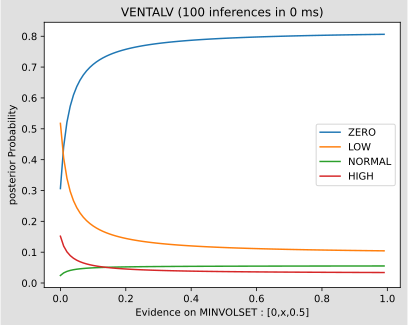

In [11]:
import time
r=range(0,100)
xs=[x/100.0 for x in r]

tf=time.time()
ys=[gum.getPosterior(bn,evs={'MINVOLSET':[0,x/100.0,0.5]},target='VENTALV').tolist()
        for x in r]
delta=time.time()-tf

p=plot(xs,ys)
legend(p,[bn['VENTALV'].label(i)
          for i in range(bn['VENTALV'].domainSize())],loc=7);
title('VENTALV (100 inferences in %d ms)'%delta);
ylabel('posterior Probability');
xlabel('Evidence on MINVOLSET : [0,x,0.5]')
plt.show()

Another example : python gives access to a large set of tools. Here the value for the equality of two probabilities of a posterior is easely computed.

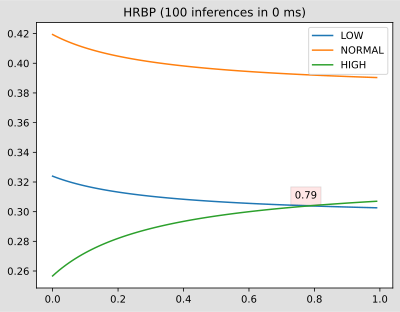

In [12]:
x=[p/100.0 for p in range(0,100)]

tf=time.time()
y=[gum.getPosterior(bn,evs={'HRBP':[1.0-p/100.0,1.0-p/100.0,p/100.0]},target='TPR').tolist()
   for p in range(0,100)]
delta=time.time()-tf

p=plot(x,y)
title('HRBP (100 inferences in %d ms)'%delta);
v=bn['TPR']
legend([v.label(i) for i in range(v.domainSize())],loc='best');
np1=(transpose(y)[0]>transpose(y)[2]).argmin()
text(x[np1]-0.05,y[np1][0]+0.005,str(x[np1]),bbox=dict(facecolor='red', alpha=0.1))
plt.show()

## BN as a classifier

### Generation of databases

Using the CSV format for the database:

In [13]:
print(f"The log2-likelihood of the generated base : {gum.generateSample(bn,1000,'out/test.csv',with_labels=True):.2f}")

The log2-likelihood of the generated base : -14925.64


In [14]:
with open("out/test.csv","r") as src:
    for _ in range(10):
        print(src.readline(),end="")

VENTALV,CO,LVEDVOLUME,VENTLUNG,DISCONNECT,MINVOLSET,ARTCO2,PRESS,MINVOL,ERRLOWOUTPUT,BP,STROKEVOLUME,PULMEMBOLUS,PAP,ERRCAUTER,HYPOVOLEMIA,CATECHOL,EXPCO2,INTUBATION,KINKEDTUBE,INSUFFANESTH,VENTMACH,HRSAT,VENTTUBE,SAO2,HR,TPR,PCWP,FIO2,HREKG,HISTORY,SHUNT,HRBP,CVP,PVSAT,ANAPHYLAXIS,LVFAILURE
ZERO,HIGH,NORMAL,ZERO,FALSE,NORMAL,HIGH,HIGH,ZERO,FALSE,HIGH,NORMAL,FALSE,LOW,FALSE,FALSE,HIGH,LOW,NORMAL,FALSE,FALSE,NORMAL,HIGH,LOW,LOW,HIGH,HIGH,NORMAL,NORMAL,HIGH,FALSE,NORMAL,HIGH,NORMAL,LOW,FALSE,FALSE
ZERO,HIGH,NORMAL,ZERO,FALSE,NORMAL,HIGH,HIGH,ZERO,FALSE,NORMAL,NORMAL,FALSE,NORMAL,FALSE,FALSE,HIGH,LOW,NORMAL,FALSE,FALSE,NORMAL,HIGH,LOW,LOW,HIGH,NORMAL,NORMAL,NORMAL,HIGH,FALSE,NORMAL,HIGH,NORMAL,NORMAL,FALSE,FALSE
ZERO,HIGH,HIGH,ZERO,FALSE,NORMAL,HIGH,LOW,ZERO,FALSE,NORMAL,NORMAL,FALSE,NORMAL,TRUE,FALSE,HIGH,LOW,NORMAL,FALSE,FALSE,NORMAL,NORMAL,LOW,LOW,HIGH,NORMAL,HIGH,NORMAL,HIGH,FALSE,NORMAL,HIGH,HIGH,LOW,FALSE,FALSE
ZERO,NORMAL,NORMAL,ZERO,FALSE,NORMAL,HIGH,HIGH,ZERO,FALSE,NORMAL,NORMAL,

### probabilistic classifier using BN

(because of the use of from-bn-generated csv files, quite good ROC curves are expected)

out/test.csv: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████|


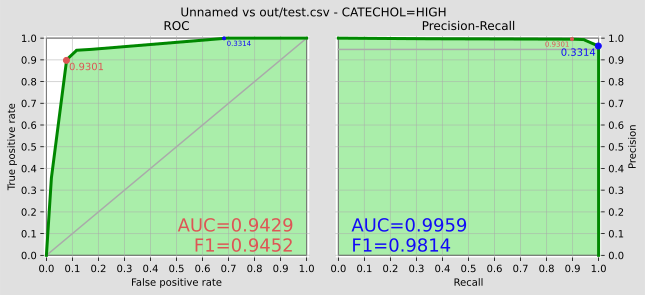

(0.9429365465757871, 0.9300899828, 0.99589486752322, 0.33143670365)

In [15]:
from pyAgrum.lib.bn2roc import showROC_PR

showROC_PR(bn,"out/test.csv",
        target='CATECHOL',label='HIGH',  # class and label
        show_progress=True,show_fig=True,with_labels=True)

Using another class variable

out/test.csv: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████|


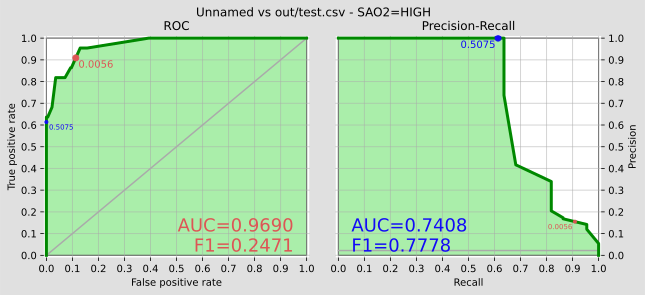

(0.9689765755716675, 0.0055727553, 0.7407705360334902, 0.5074962099)

In [16]:
showROC_PR(bn,"out/test.csv",'SAO2','HIGH',show_progress=True)

## Fast prototyping for BNs

In [17]:
bn1=gum.fastBN("a->b;a->c;b->c;c->d",3)

gnb.sideBySide(*[gnb.getInference(bn1,evs={'c':val},targets={'a','c','d'}) for val in range(3)],
              captions=[f"Inference given that $c={val}$" for val in range(3)])

In [18]:
print(gum.getPosterior(bn1,evs={'c':0},target='c'))
print(gum.getPosterior(bn1,evs={'c':0},target='d'))

# using pyagrum.lib.notebook's helpers
gnb.flow.row(gum.getPosterior(bn1,evs={'c':0},target='c'),gum.getPosterior(bn1,evs={'c':0},target='d'))


  c                          |
0        |1        |2        |
---------|---------|---------|
 1.0000  | 0.0000  | 0.0000  |


  d                          |
0        |1        |2        |
---------|---------|---------|
 0.3866  | 0.2959  | 0.3175  |



## Joint posterior, impact of multiple evidence

In [19]:
bn=gum.fastBN("a->b->c->d;b->e->d->f;g->c")
gnb.sideBySide(bn,gnb.getInference(bn))

In [20]:
ie=gum.LazyPropagation(bn)
ie.addJointTarget({"e","f","g"})
ie.makeInference()
gnb.sideBySide(ie.jointPosterior({"e","f","g"}),ie.jointPosterior({"e","g"}),
               captions=["Joint posterior $P(e,f,g)$","Joint posterior $P(e,f)$"])

In [21]:
gnb.sideBySide(ie.evidenceImpact("a",["e","f"]),ie.evidenceImpact("a",["d","e","f"]),
              captions=["$\\forall e,f, P(a|e,f)$",
                        "$\\forall d,e,f, P(a|d,e,f)=P(a|d,e)$ using d-separation"]
                        )

In [22]:
gnb.sideBySide(ie.evidenceJointImpact(["a","b"],["e","f"]),ie.evidenceJointImpact(["a","b"],["d","e","f"]),
              captions=["$\\forall e,f, P(a,b|e,f)$",
                        "$\\forall d,e,f, P(a,b|d,e,f)=P(a,b|d,e)$ using d-separation"]
                        )

## Most Probable Explanation

The Most Probable Explanation (MPE) is a concept commonly used in the field of probabilistic reasoning and Bayesian statistics. It refers to the set of values for the variables in a given probabilistic model that is the most consistent with (that maximizes the likelihood of) the observed evidence. Essentially, it represents the most likely scenario or explanation given the available evidenceand the underlying probabilistic model.

In [23]:
ie=gum.LazyPropagation(bn)
print(ie.mpe())

<d:1|e:0|c:1|b:0|a:1|g:1|f:1>


In [24]:
evs={"e":0,"g":0}
ie.setEvidence(evs)
vals=ie.mpeLog2Posterior()
print(f"The most probable explanation for observation {evs} is the configuration {vals.first} for a log probability of {vals.second:.6f}")

The most probable explanation for observation {'e': 0, 'g': 0} is the configuration <g:0|e:0|d:1|f:1|c:1|b:0|a:1> for a log probability of -2.844769
